<center>
<h1><u>Analysis of Crime Types in Baltimore City, MD | Exploratory Data Analysis (EDA)</u></h1>
<h3>Author: Ola Sanusi, PhD</h3>
</center>

___

## Introduction 

___

This project involves using Exploratory Data Analysis (EDA) to draw inferences on crime types and crime rates in Baltimore City, MD. Historical crimes data of Baltimore City, MD was obtained from [Baltimore Open Data Website](https://data.baltimorecity.gov/datasets/part1-crime-data/data?geometry=-86.354%2C37.108%2C-71.534%2C40.112) to explore the different type of crimes occurring in the city at different times of the year. It is important that the Baltimore police department are able to forecast crime types so that they will be able to allocate appropriate resources to the right neighborhood and district. The project identify the most important crimes that need special attention.

___

## Loading all libraries and dataset

___

In [1]:
#import all needed libraries and perform any required environment setup
import pandas as pd
import calendar
import squarify
from pandas.tseries.holiday import USFederalHolidayCalendar as calender

#expanding the number of visible columms and rows
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
#configure the plotting style and size
sns.set(style='darkgrid',palette='Dark2',rc={'figure.figsize':(9,6),'figure.dpi':100})

The dataset

In [2]:
filepath = r"C:\Users\lanre\baltimore_crime\data\raw\Part1_Crime_data.csv"
bpd = pd.read_csv(filepath, low_memory=False)
bpd.head(5)

,X,Y,RowID,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,VRIName,Total_Incidents
0,1.414739e+06,590642.241552,1,2021/03/25 01:20:20+00,1A,0 S CAREY ST,HOMICIDE,Outside,FIREARM,933,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)",STREET,Tri-District,1
1,1.414739e+06,590642.241552,2,2021/03/25 01:20:20+00,9S,0 S CAREY ST,SHOOTING,Outside,FIREARM,933,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)",STREET,Tri-District,1
2,1.422741e+06,612565.958799,4,2021/03/24 00:08:00+00,4E,4900 YORK RD,COMMON ASSAULT,I,NaN,521,NORTHERN,WINSTON-GOVANS,39.3480,-76.6096,"(39.348,-76.6096)",APT/CONDO - OCCUPIED,NaN,1
3,1.424244e+06,572215.042971,5,2021/03/24 07:53:00+00,4E,400 E PATAPSCO AVE,COMMON ASSAULT,I,NaN,913,SOUTHERN,BROOKLYN,39.2372,-76.6049,"(39.2372,-76.6049)",ROW/TOWNHOUSE-OCC,Brooklyn,1
4,1.422815e+06,601711.904140,6,2021/03/24 21:54:00+00,3AJF,2500 GREENMOUNT AVE,ROBBERY - CARJACKING,O,FIREARM,513,NORTHERN,HARWOOD,39.3182,-76.6095,"(39.3182,-76.6095)",GAS STATION,NaN,1


___

## Examining and preprocessing the dataset

___

In [3]:
bpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331388 entries, 0 to 331387
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                331388 non-null  float64
 1   Y                331388 non-null  float64
 2   RowID            331388 non-null  int64  
 3   CrimeDateTime    331388 non-null  object 
 4   CrimeCode        331388 non-null  object 
 5   Location         329828 non-null  object 
 6   Description      331388 non-null  object 
 7   Inside_Outside   289662 non-null  object 
 8   Weapon           71502 non-null   object 
 9   Post             331044 non-null  object 
 10  District         331044 non-null  object 
 11  Neighborhood     331023 non-null  object 
 12  Latitude         331388 non-null  float64
 13  Longitude        331388 non-null  float64
 14  GeoLocation      331388 non-null  object 
 15  Premise          289418 non-null  object 
 16  VRIName          39343 non-null   obje

In [4]:
#check missing values
def missing_value(df):
    """" Function to calculate the number and percent of missing values in a dataframe"""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_value = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_value

In [5]:
missing_value(bpd)

,Total,Percent
VRIName,292045,88.127814
Weapon,259886,78.423479
Premise,41970,12.664912
Inside_Outside,41726,12.591283
Location,1560,0.470747
Neighborhood,365,0.110143
Post,344,0.103806
District,344,0.103806
GeoLocation,0,0.000000
Longitude,0,0.000000


####  Drop columns with huge amount of missing values

In [6]:
def drop_missing_cols (df, threshold=0.7):
	""" Drop missing values for columns which have missing values
	rate higher than threshold( default=70%) """
	df = df[df.columns[df.isnull().mean() < threshold]]
	return df

In [7]:
bpd = drop_missing_cols(bpd)
bpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331388 entries, 0 to 331387
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                331388 non-null  float64
 1   Y                331388 non-null  float64
 2   RowID            331388 non-null  int64  
 3   CrimeDateTime    331388 non-null  object 
 4   CrimeCode        331388 non-null  object 
 5   Location         329828 non-null  object 
 6   Description      331388 non-null  object 
 7   Inside_Outside   289662 non-null  object 
 8   Post             331044 non-null  object 
 9   District         331044 non-null  object 
 10  Neighborhood     331023 non-null  object 
 11  Latitude         331388 non-null  float64
 12  Longitude        331388 non-null  float64
 13  GeoLocation      331388 non-null  object 
 14  Premise          289418 non-null  object 
 15  Total_Incidents  331388 non-null  int64  
dtypes: float64(4), int64(2), object(10)
me

####  Drop unneeded columns and deal with remaining missing values

In [8]:
#drop columns that are not necssary for this project
cols_drop = ['CrimeCode','Total_Incidents','Post','Inside_Outside','Premise','RowID','X','Y']
bpd = bpd.drop(cols_drop, axis=1)
#Fill missing values in the District and Neighborhood with the mode and drop the remaining missing values
bpd['District'] = bpd['District'].fillna(bpd['District'].mode())
bpd['Neighborhood'] = bpd['Neighborhood'].fillna(bpd['Neighborhood'].mode())
bpd =bpd.dropna().reset_index(drop=True)
bpd.head()

,CrimeDateTime,Location,Description,District,Neighborhood,Latitude,Longitude,GeoLocation
0,2021/03/25 01:20:20+00,0 S CAREY ST,HOMICIDE,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)"
1,2021/03/25 01:20:20+00,0 S CAREY ST,SHOOTING,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)"
2,2021/03/24 00:08:00+00,4900 YORK RD,COMMON ASSAULT,NORTHERN,WINSTON-GOVANS,39.3480,-76.6096,"(39.348,-76.6096)"
3,2021/03/24 07:53:00+00,400 E PATAPSCO AVE,COMMON ASSAULT,SOUTHERN,BROOKLYN,39.2372,-76.6049,"(39.2372,-76.6049)"
4,2021/03/24 21:54:00+00,2500 GREENMOUNT AVE,ROBBERY - CARJACKING,NORTHERN,HARWOOD,39.3182,-76.6095,"(39.3182,-76.6095)"


####  Format crime date to datetime and set index as datetime

In [9]:
%%time
#Split Datetime into year, month, day, day name, hour and minute

bpd['Timestamp'] = pd.to_datetime(bpd['CrimeDateTime'], format='%Y-%m-%d %H:%M:%S')
bpd['year'] = bpd['Timestamp'].dt.year
bpd['month'] = bpd['Timestamp'].dt.month
bpd['day'] = bpd['Timestamp'].dt.day
bpd['date'] = bpd['Timestamp'].dt.date
bpd['day_name'] = bpd['Timestamp'].dt.day_name()
bpd['weekday'] = bpd['Timestamp'].dt.weekday
bpd['quarter'] = bpd['Timestamp'].dt.quarter
bpd['hour'] = bpd['Timestamp'].dt.hour
bpd['minute'] = bpd['Timestamp'].dt.minute
bpd['time'] = bpd['Timestamp'].dt.time
bpd['month_name'] = bpd['month'].apply(lambda x: calendar.month_abbr[x])
bpd.index = bpd['Timestamp']
bpd.head(3)

Wall time: 4.43 s


,CrimeDateTime,Location,Description,District,Neighborhood,Latitude,Longitude,GeoLocation,Timestamp,year,month,day,date,day_name,weekday,quarter,hour,minute,time,month_name
Timestamp,,,,,,,,,,,,,,,,,,,,
2021-03-25 01:20:20+00:00,2021/03/25 01:20:20+00,0 S CAREY ST,HOMICIDE,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)",2021-03-25 01:20:20+00:00,2021,3,25,2021-03-25,Thursday,3,1,1,20,01:20:20,Mar
2021-03-25 01:20:20+00:00,2021/03/25 01:20:20+00,0 S CAREY ST,SHOOTING,SOUTHERN,UNION SQUARE,39.2879,-76.6382,"(39.2879,-76.6382)",2021-03-25 01:20:20+00:00,2021,3,25,2021-03-25,Thursday,3,1,1,20,01:20:20,Mar
2021-03-24 00:08:00+00:00,2021/03/24 00:08:00+00,4900 YORK RD,COMMON ASSAULT,NORTHERN,WINSTON-GOVANS,39.3480,-76.6096,"(39.348,-76.6096)",2021-03-24 00:08:00+00:00,2021,3,24,2021-03-24,Wednesday,2,1,0,8,00:08:00,Mar


**Date range that dataset covers**

In [10]:
# min and max CrimeDate of the dateframe
bpd.date.min(), bpd.date.max()

(datetime.date(1963, 10, 30), datetime.date(2021, 3, 25))

####  Explore sparsity of the data

In [11]:
#Look at the sparsitity of the data
bpd.groupby(['year','day_name']).size().unstack('day_name')

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
1963,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1969,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,26.0,NaN,NaN
1973,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1975,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1977,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1978,NaN,NaN,NaN,3.0,NaN,NaN,NaN
1979,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1980,NaN,NaN,NaN,NaN,NaN,1.0,NaN


####  Subsetting the time series from 2014 to 2020

In [12]:
bpd = bpd[(bpd['year']>=2014) & (bpd['year']!=2021)] 
bpd.groupby(['year','day_name']).size().unstack('day_name')

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2014,6826,6675,6334,6056,6359,6331,6487
2015,7029,7182,6582,6344,6906,7034,6757
2016,7289,7048,6610,6545,6899,7055,6984
2017,7747,7523,7234,7093,7310,7363,7550
2018,7167,7117,6551,6396,7064,7026,6857
2019,6700,6695,6530,6219,6432,6795,6616
2020,5414,5196,5299,5035,4952,4889,4961


#### Create seasons feature

In [13]:
def season_calc(month):
    """adding season based on meterological seasons; spring ->March to May, summer -> June to August,
      fall-> september to November, Winter-> December to Febraury. """
    if month in [3,4,5]:
        return "spring"
    elif month in [6,7,8]:
        return "summer"
    elif month in [9,10,11]:
        return "fall"
    else:
        return "winter"

In [14]:
bpd['season'] = bpd.month.apply(lambda x: season_calc(x))

___

## Exploratory Data Analysis (EDA)

___

#### Descriptive statistics

Generalized view of the crimes

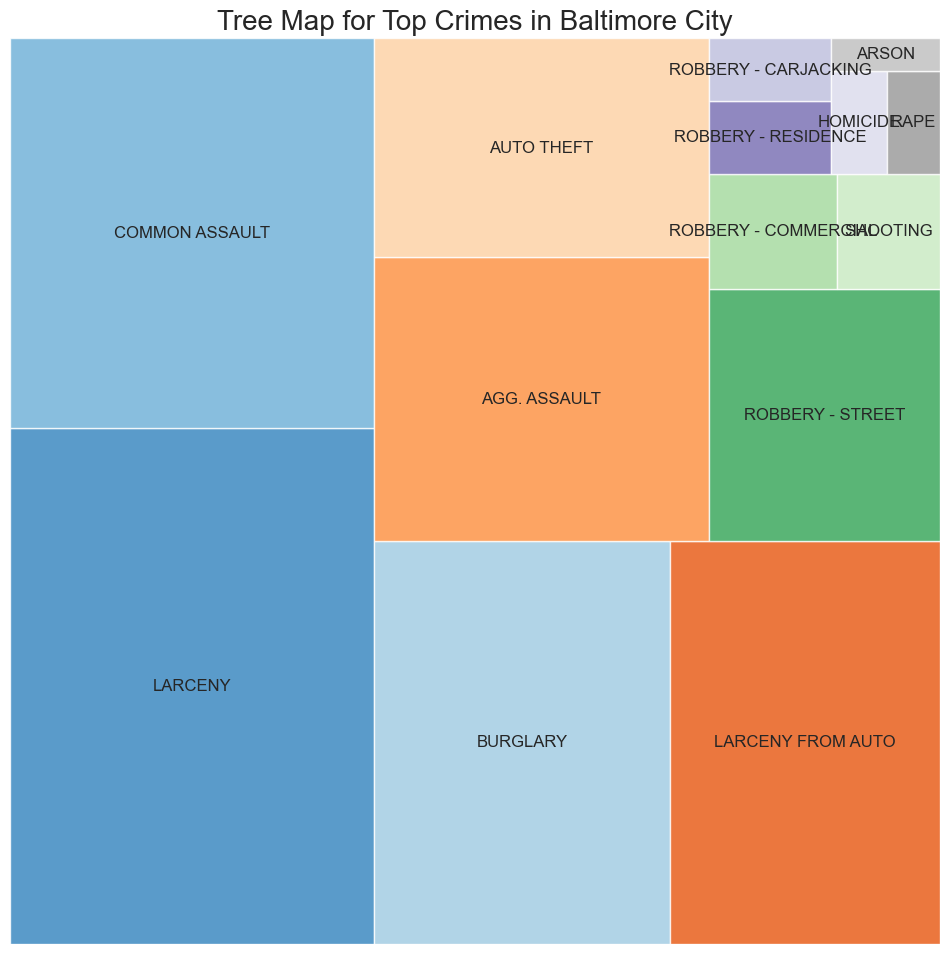

In [15]:
def plot_treemap(df):
    # plotting a tree map

    y = bpd['Description'].value_counts().head(25)

    plt.rcParams['figure.figsize'] = (12, 12)


    color = plt.cm.tab20c(np.linspace(0, 1, 15))
    squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
    plt.title('Tree Map for Top Crimes in Baltimore City', fontsize = 20)

    plt.axis('off')
    plt.show()
    
plot_treemap(bpd)

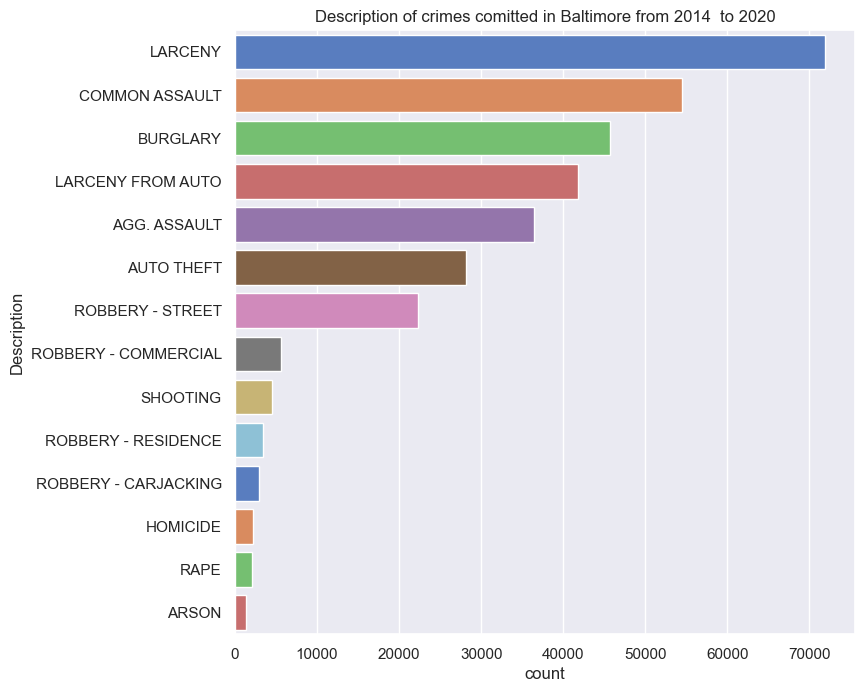

In [16]:
def plot_crime_dist(df):
    plt.figure(figsize=(8,8))
    cat_freq = bpd.Description.value_counts()
    sns.countplot(y="Description", data=bpd, order=cat_freq.index, palette='muted').set_title('Description of crimes comitted in Baltimore from 2014  to 2020');

plot_crime_dist(bpd)


In [17]:
bpd.Description.value_counts()

LARCENY                 71959
COMMON ASSAULT          54485
BURGLARY                45760
LARCENY FROM AUTO       41789
AGG. ASSAULT            36388
AUTO THEFT              28153
ROBBERY - STREET        22301
ROBBERY - COMMERCIAL     5663
SHOOTING                 4519
ROBBERY - RESIDENCE      3419
ROBBERY - CARJACKING     2961
HOMICIDE                 2187
RAPE                     2109
ARSON                    1370
Name: Description, dtype: int64

In [18]:
bpd.Description.value_counts(normalize=True)*100

LARCENY                 22.273984
COMMON ASSAULT          16.865132
BURGLARY                14.164420
LARCENY FROM AUTO       12.935248
AGG. ASSAULT            11.263438
AUTO THEFT               8.714399
ROBBERY - STREET         6.902988
ROBBERY - COMMERCIAL     1.752909
SHOOTING                 1.398798
ROBBERY - RESIDENCE      1.058308
ROBBERY - CARJACKING     0.916539
HOMICIDE                 0.676958
RAPE                     0.652814
ARSON                    0.424066
Name: Description, dtype: float64

**There are 14 crime types reported and the top 5 crimes (Larceny-22.3%, Common assault-16.9%, Burglary-14.2%, Larceny from auto-12.9%, Agg. assault-11.3%) make up 77.6% of the total crimes**

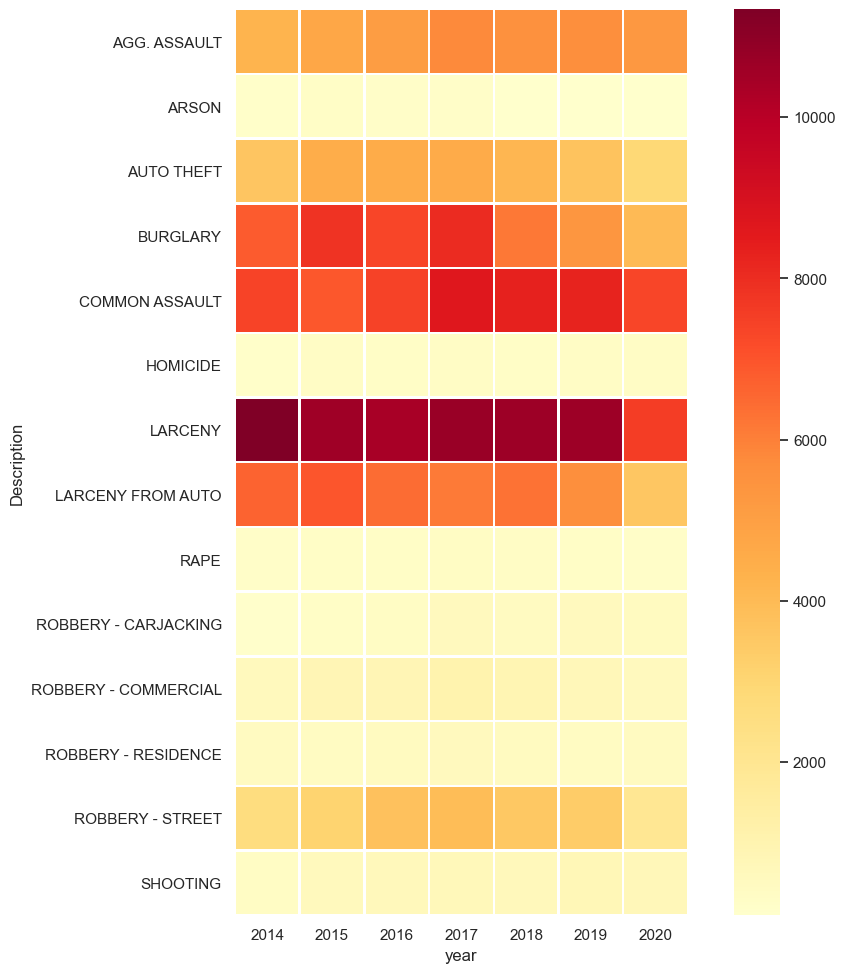

In [19]:
def yearly_crimetype(df):
    crime_table2 = bpd.groupby(['year','Description']).size().unstack('year')
    sns.heatmap(crime_table2, cmap='YlOrRd', linewidth=1, linecolor='w', square=True)

yearly_crimetype(bpd)

In [20]:
def crimes (df, label):
        fig = plt.figure(figsize=(12,7))
        layout = (2,2)
        ax1 = plt.subplot2grid(layout, (0,0), colspan=2)
        ax2 = plt.subplot2grid(layout, (1,0))
        ax3 = plt.subplot2grid(layout, (1,1))
        crimes_by_time = df.groupby('hour').size().reset_index(name='No. of Crimes')
        crimes_by_time['hours'] = crimes_by_time['hour'].apply(lambda x: str(x)+':00')
        sns.pointplot(data=crimes_by_time, x="hours", y="No. of Crimes", color="salmon", ax=ax1)
        ax1.set_title(f'Baltimore City Crimes over 7 years (2014 to 2020) \n {label}')
        sns.countplot(x="season", data=df, palette='muted', ax=ax2)
        sns.countplot(x="year", data=df, palette="Accent", ax=ax3)
        plt.tight_layout()

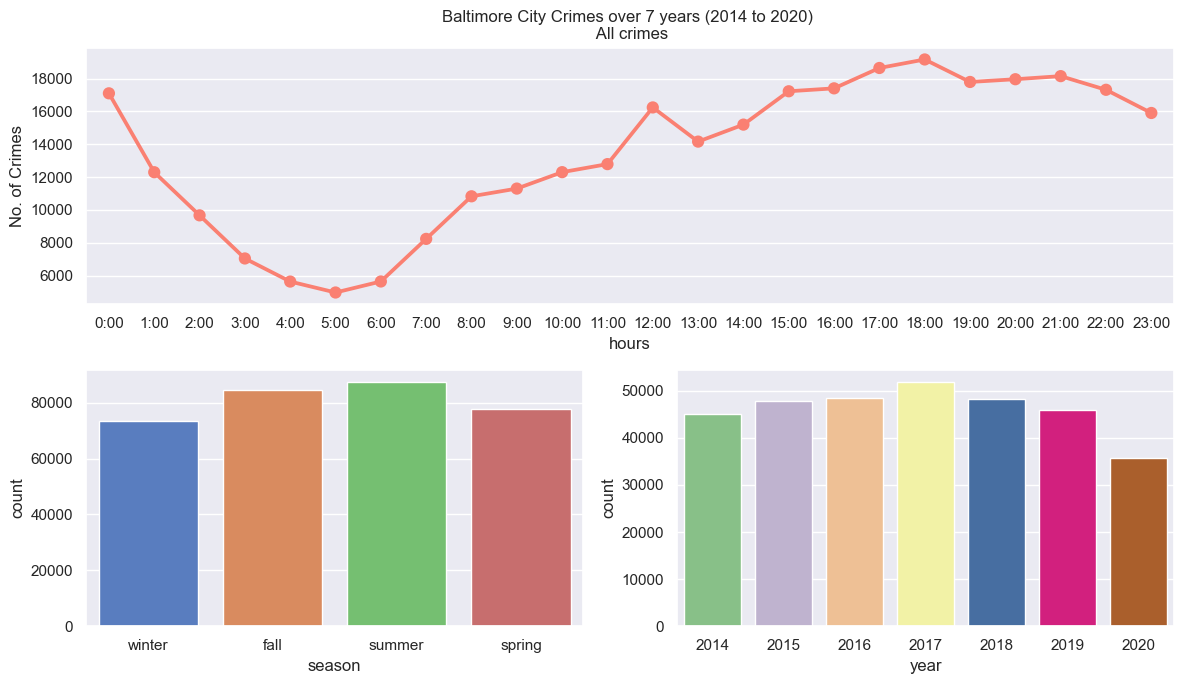

In [21]:
crimes(bpd, 'All crimes')

In [22]:
def district_year(df, label):
    f, axes = plt.subplots(1,2)
    f.set_figheight(5)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.5)
    crime_table = df.groupby(['year','day_name']).size().unstack('day_name')
    crime_table = crime_table[['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday']]
    cat_freq = df.District.value_counts()
    axes[0].set_title("Crimes by District")
    sns.countplot(y="District", data=df, order=cat_freq.index, palette='muted',ax=axes[0])
    #axes[1].set_title("")
    sns.heatmap(crime_table, linewidth=1, linecolor='w', cmap='YlOrRd', square=True, ax=axes[1])
    f.suptitle(f'Baltimore City Crimes over 7 years (2014 to 2020) \n {label}', y=0.98)


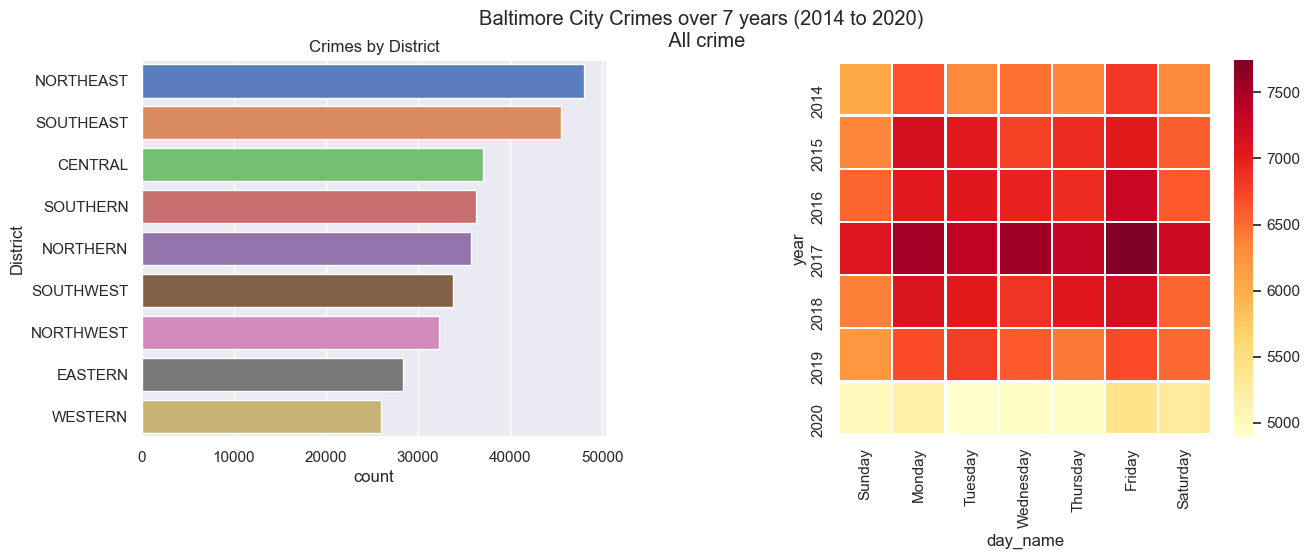

In [23]:
district_year(bpd, 'All crime')

## Examining Dangerous and Safe areas in Baltimore City

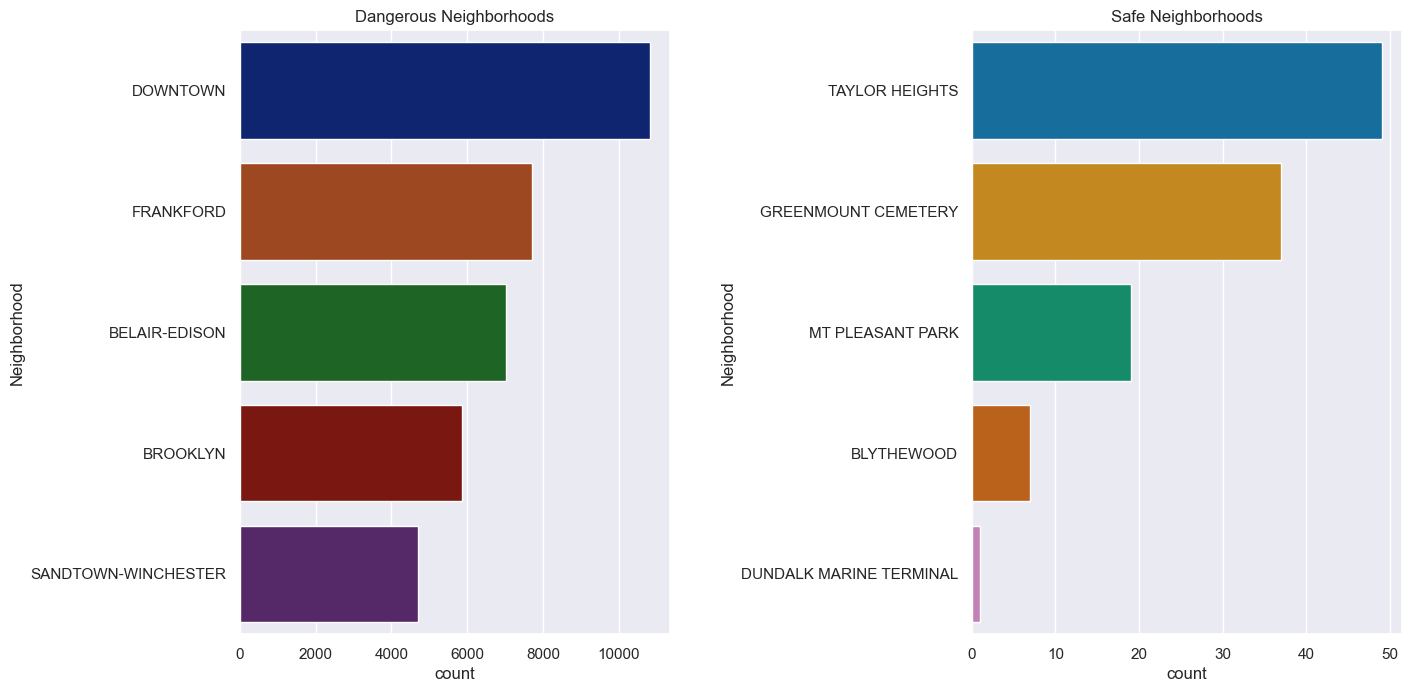

In [24]:
def plot_neighborhood(df):
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = bpd.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:5]
    safe = neighborhood_freq.iloc[-5:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=bpd, order=dangerous.index, palette='dark', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=bpd, order=safe.index, palette='colorblind', ax=axes[1])
    
plot_neighborhood(bpd)

## Yearly trend of individual crime type

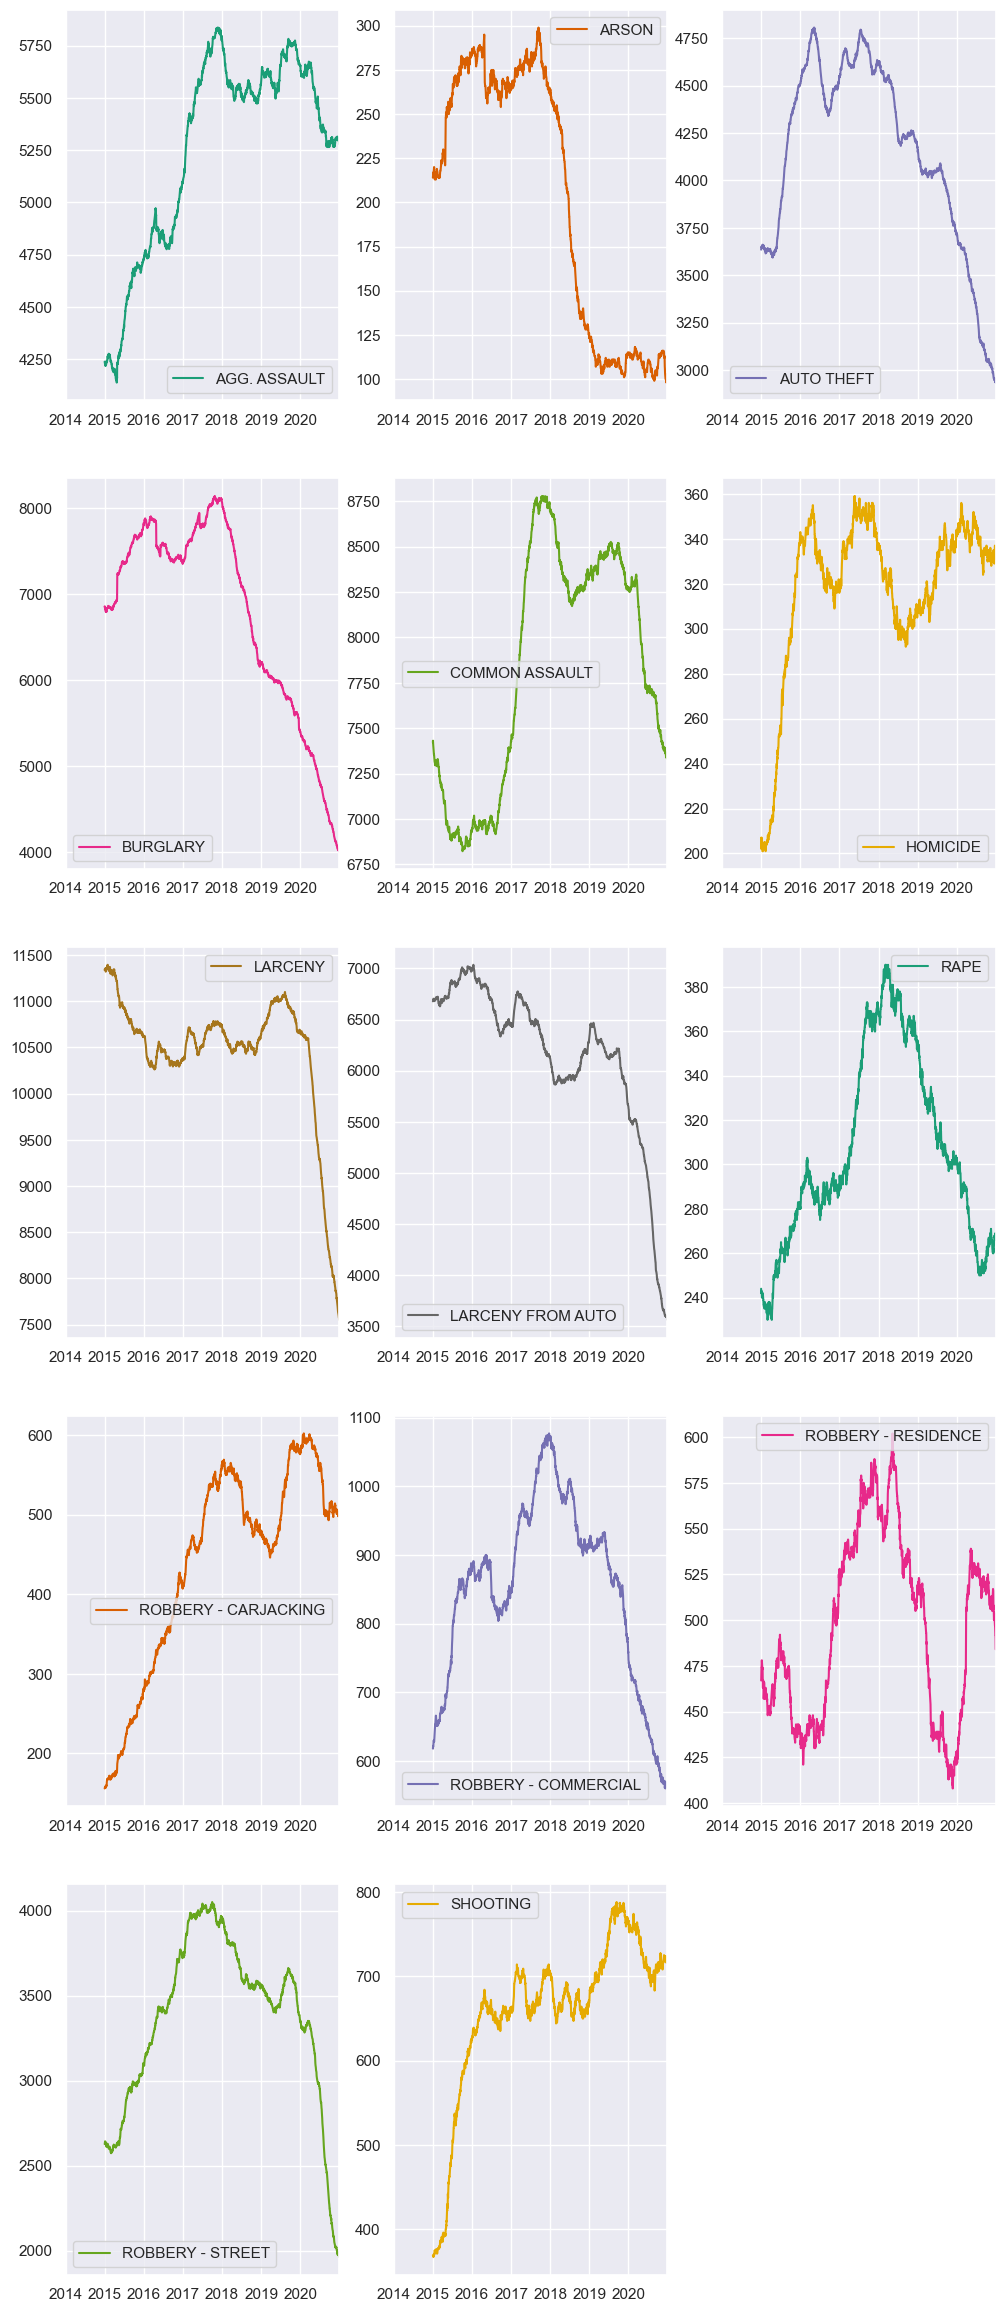

In [25]:
def crime_type_trend(df):
    crimes_count_date=bpd.pivot_table('CrimeDateTime',aggfunc=np.size,columns='Description',index=bpd.index.date,fill_value=0)
    crimes_count_date.index=pd.DatetimeIndex(crimes_count_date.index)
    plot=crimes_count_date.rolling(365).sum().plot(figsize=(12,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)
    
crime_type_trend(bpd)

**Yearly trends of individual crime types**

Examining the individual crime types reveals that only five crime types show increasing trends. Agg, assault increased conseiderably when comparing the count between 2014 and 2020. Homicide, Robbery-carjacking, shooting and Rape all display increased trends although they all make up a small fraction of the overall crime. 

## Summary of crime types with increasing trends

| Crime Types        | Increase from 2014 to 2020 (%) |
| ------------------ | ------------------------------ |
| Agg. assault       | 23                             |
| Homicide           | 70                             |
| Rape               | 8                              |
| Robbery-Carjacking | 400                            |
| Shooting           | 100                            |

## Examining the safest and dangerous places for the crime types with increasing trends

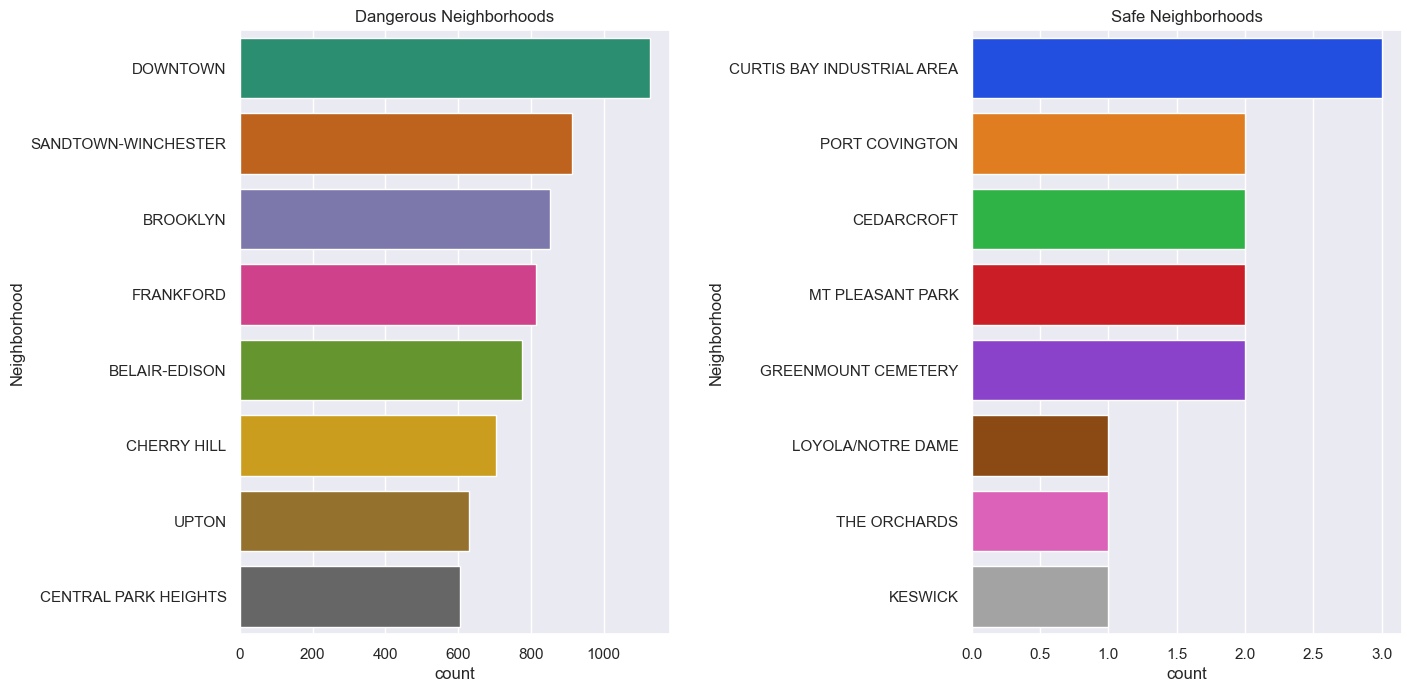

In [26]:
def assault_neighborhood(df):
    assault_df = bpd[bpd.Description=="AGG. ASSAULT"]
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = assault_df.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:8]
    safe = neighborhood_freq.iloc[-8:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=assault_df, order=dangerous.index, palette='Dark2', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=assault_df, order=safe.index, palette='bright', ax=axes[1])
    
assault_neighborhood(bpd)

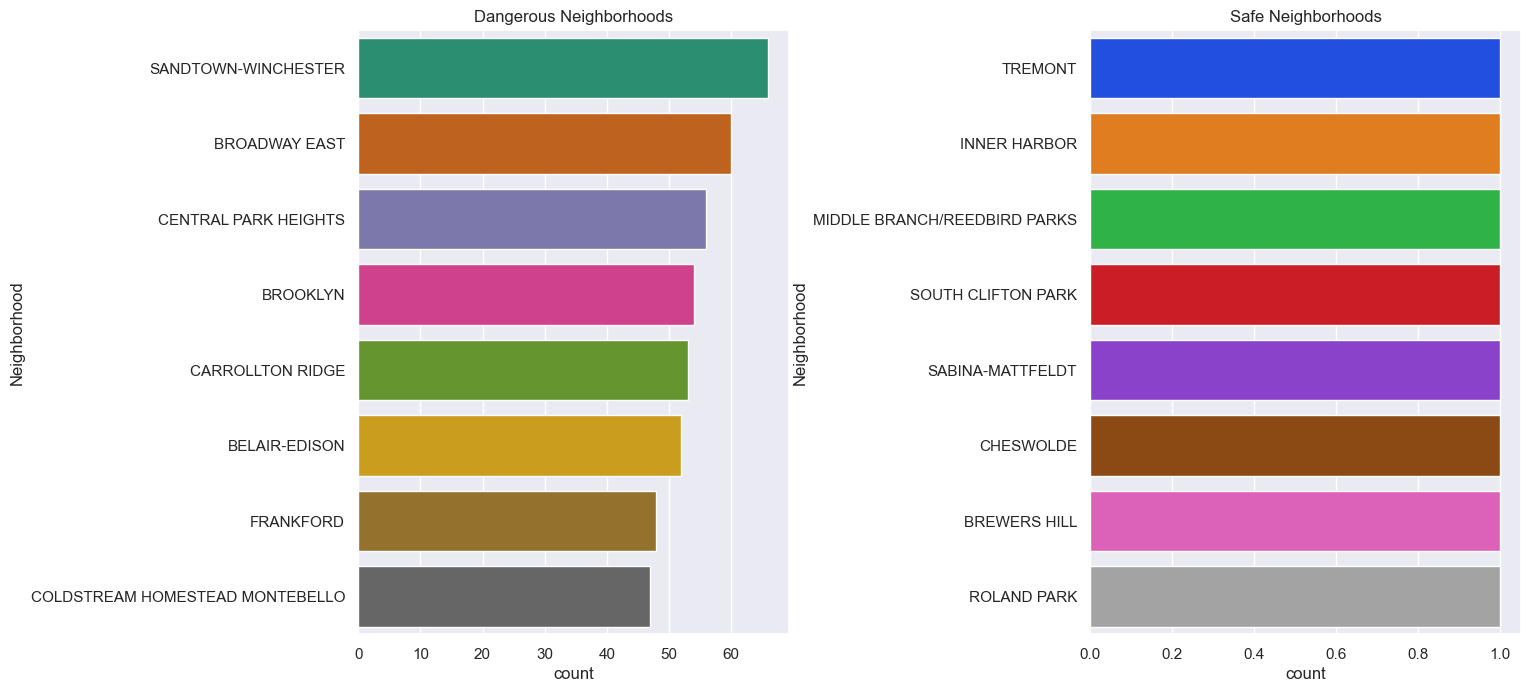

In [27]:
def homicide_neighborhood(df):
    homicide_df = bpd[bpd.Description=="HOMICIDE"]
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = homicide_df.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:8]
    safe = neighborhood_freq.iloc[-8:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=homicide_df, order=dangerous.index, palette='Dark2', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=homicide_df, order=safe.index, palette='bright', ax=axes[1])
    
homicide_neighborhood(bpd)

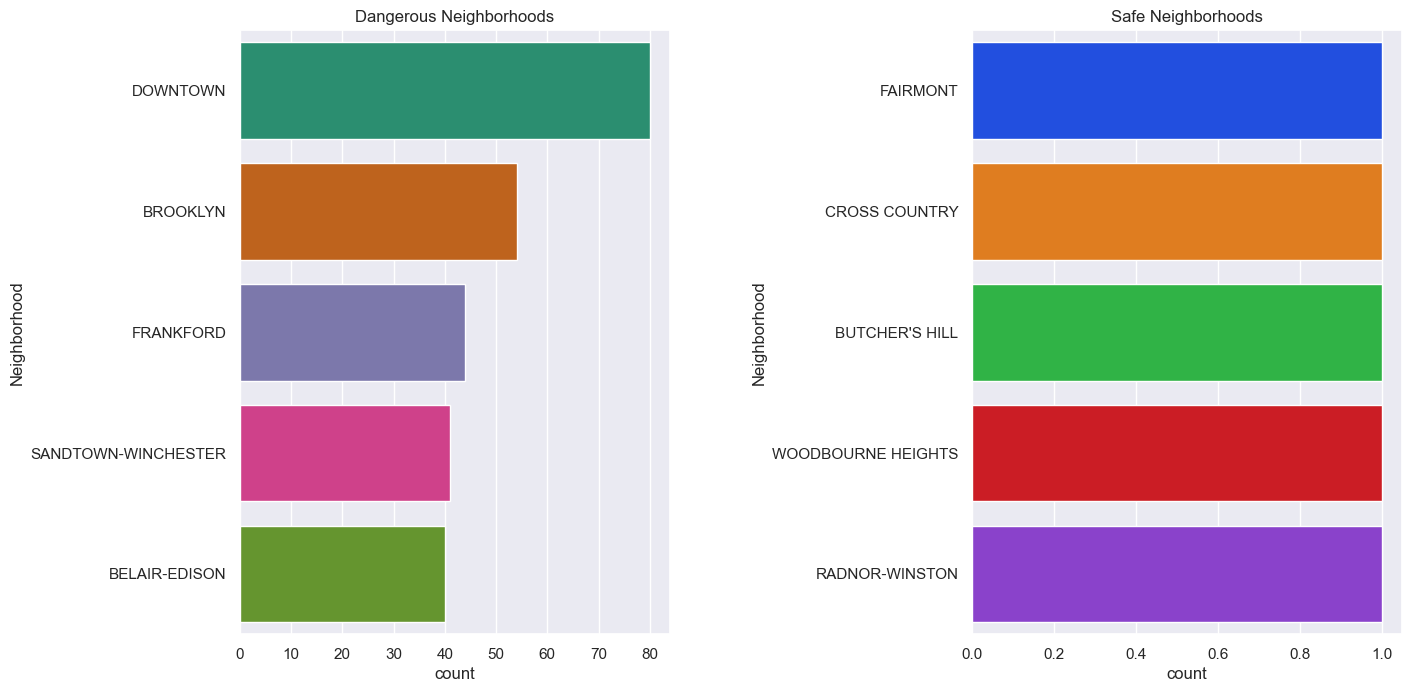

In [28]:
def rape_neighborhood(df):
    sexual_assault_df = bpd[bpd.Description=="RAPE"]
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = sexual_assault_df.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:5]
    safe = neighborhood_freq.iloc[-5:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=sexual_assault_df, order=dangerous.index, palette='Dark2', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=sexual_assault_df, order=safe.index, palette='bright', ax=axes[1])
    
rape_neighborhood(bpd)

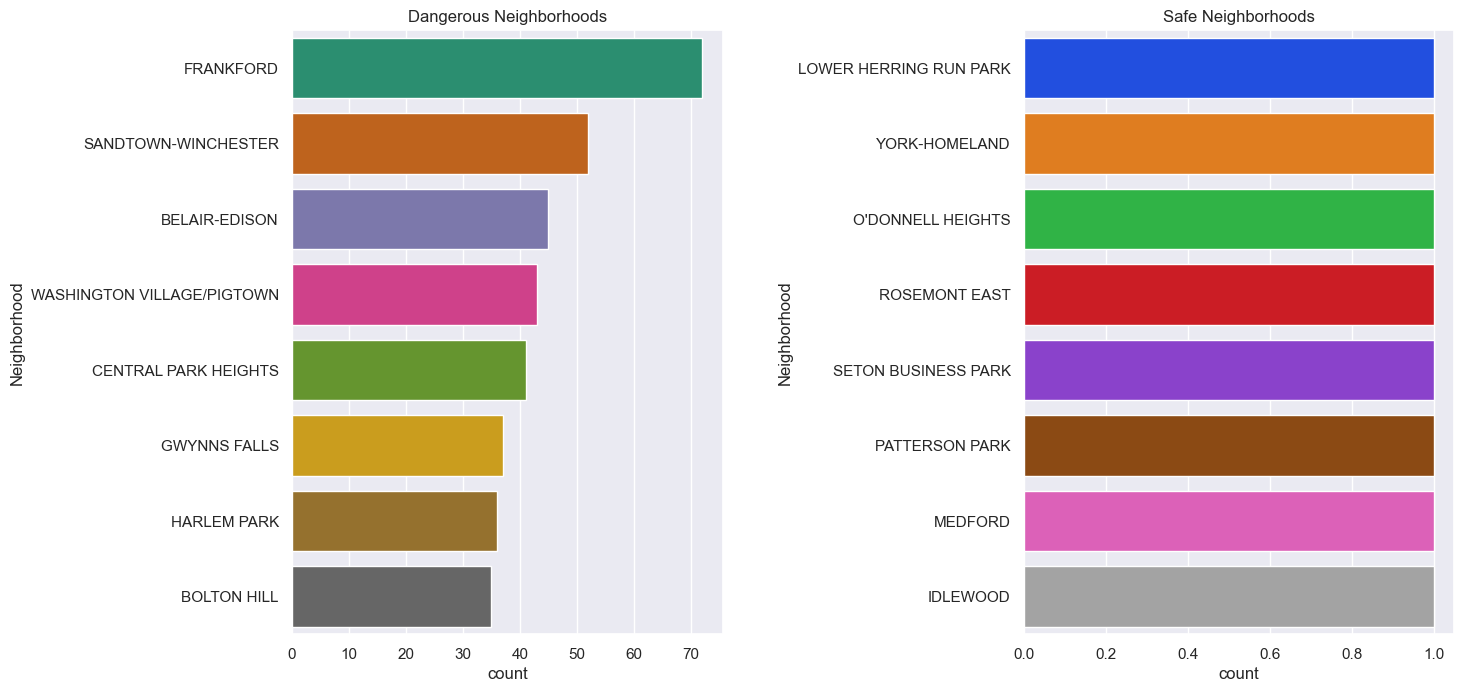

In [29]:
def carjack_neighborhood(df):
    carjack_df = bpd[bpd.Description=="ROBBERY - CARJACKING"]
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = carjack_df.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:8]
    safe = neighborhood_freq.iloc[-8:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=carjack_df, order=dangerous.index, palette='Dark2', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=carjack_df, order=safe.index, palette='bright', ax=axes[1])
    
carjack_neighborhood(bpd)

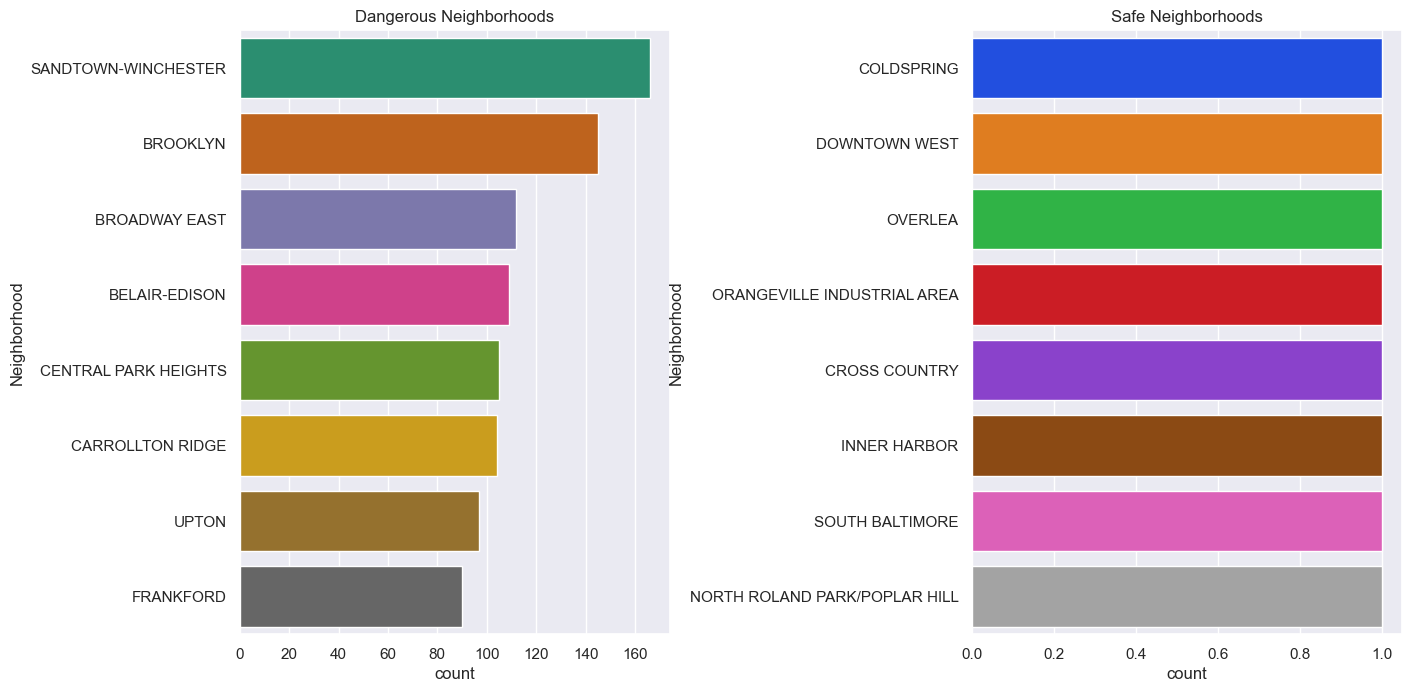

In [30]:
def shooting_neighborhood(df):
    shooting_df = bpd[bpd.Description=="SHOOTING"]
    f, axes = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.7)
    neighborhood_freq = shooting_df.Neighborhood.value_counts()
    dangerous = neighborhood_freq.iloc[:8]
    safe = neighborhood_freq.iloc[-8:]
    axes[0].set_title("Dangerous Neighborhoods")
    sns.countplot(y="Neighborhood", data=shooting_df, order=dangerous.index, palette='Dark2', ax=axes[0])
    axes[1].set_title("Safe Neighborhoods")
    sns.countplot(y="Neighborhood", data=shooting_df, order=safe.index, palette='bright', ax=axes[1])
    
shooting_neighborhood(bpd)

## Summary

In [31]:
def crimes (df, column, label):
        dummy_df = df[df.Description==column]
        fig = plt.figure(figsize=(12,7))
        layout = (2,2)
        ax1 = plt.subplot2grid(layout, (0,0), colspan=2)
        ax2 = plt.subplot2grid(layout, (1,0))
        ax3 = plt.subplot2grid(layout, (1,1))
        crimes_by_time = dummy_df.groupby('hour').size().reset_index(name='No. of Crimes')
        crimes_by_time['hours'] = crimes_by_time['hour'].apply(lambda x: str(x)+':00')
        sns.pointplot(data=crimes_by_time, x="hours", y="No. of Crimes", color="salmon", ax=ax1)
        ax1.set_title(f'Baltimore City Crimes over 7 years (2014 to 2020) \n {label}')
        sns.countplot(x="season", data=dummy_df, palette='muted', ax=ax2)
        sns.countplot(x="year", data=dummy_df, palette="Accent", ax=ax3)
        plt.tight_layout()

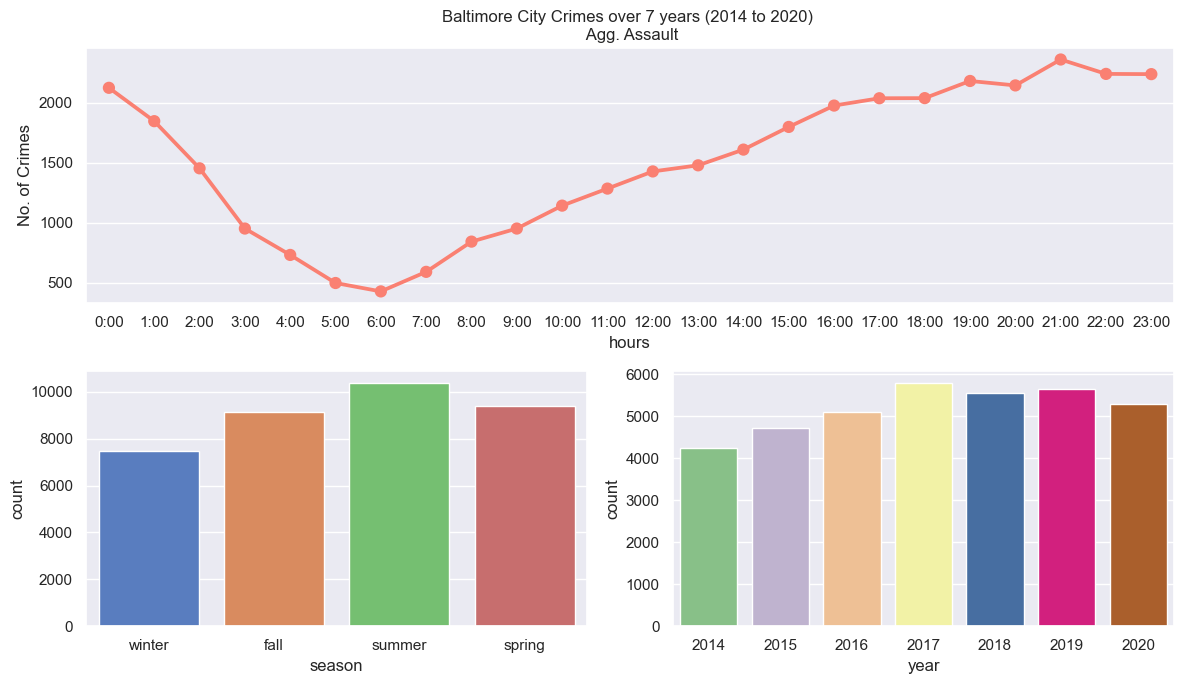

In [32]:
crimes (bpd, 'AGG. ASSAULT', 'Agg. Assault')

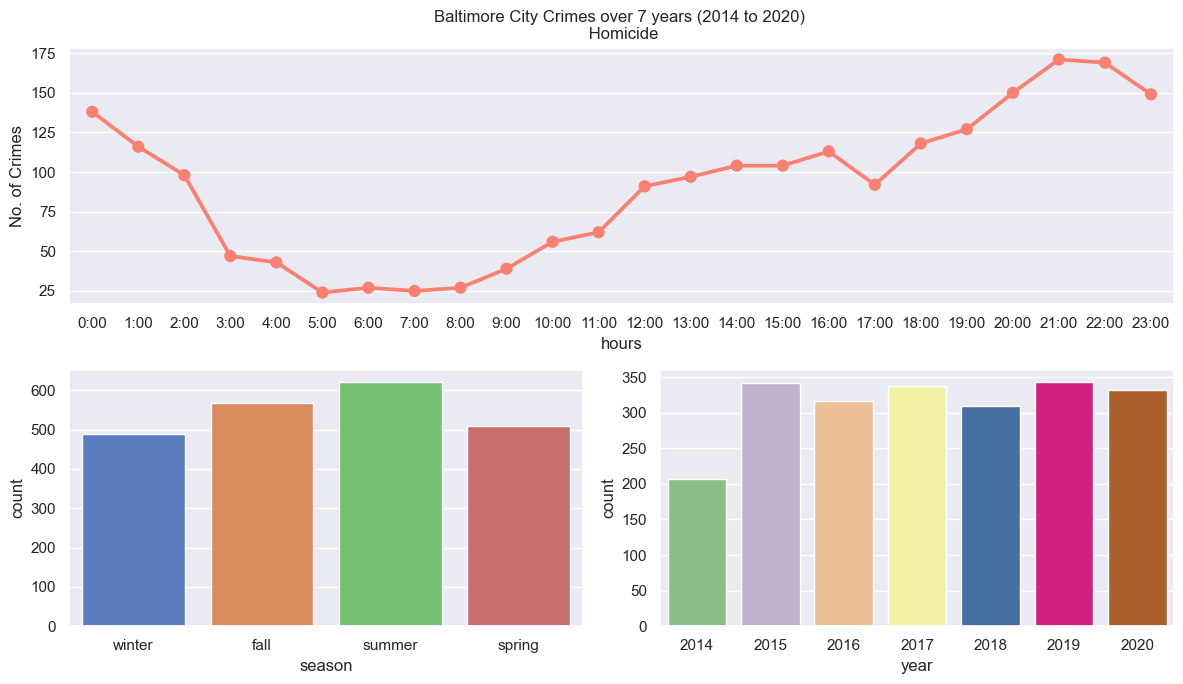

In [33]:
crimes (bpd, "HOMICIDE", 'Homicide')

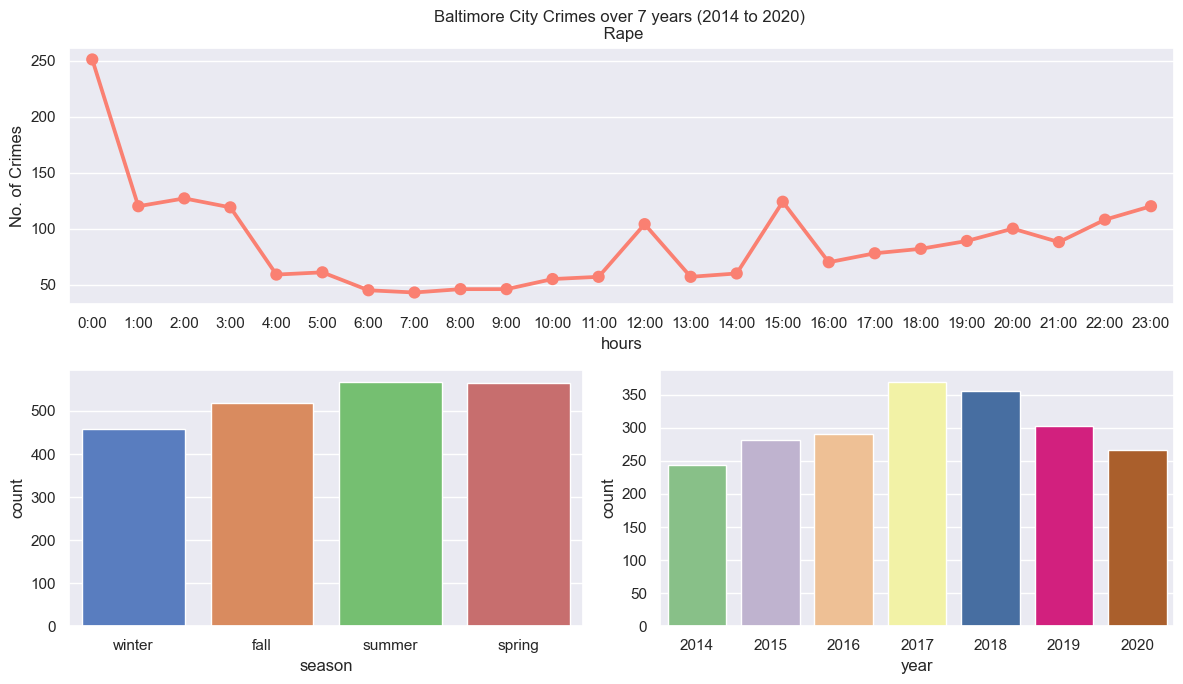

In [34]:
crimes (bpd, "RAPE", 'Rape')

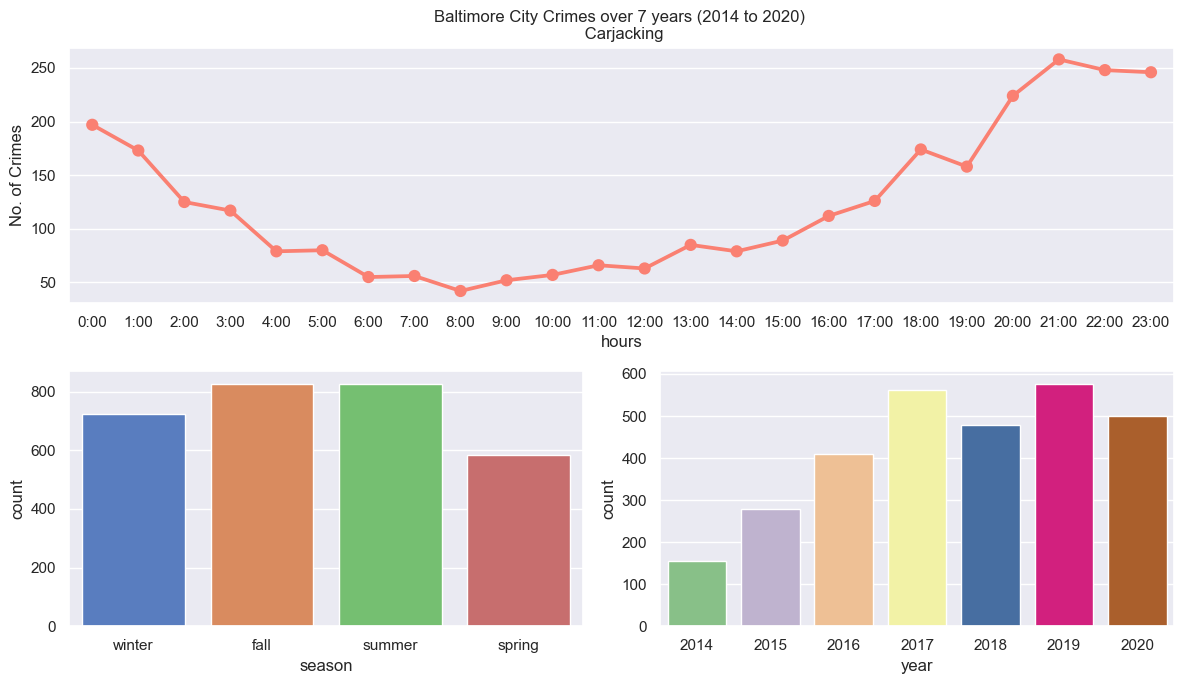

In [35]:
crimes (bpd, "ROBBERY - CARJACKING", 'Carjacking')

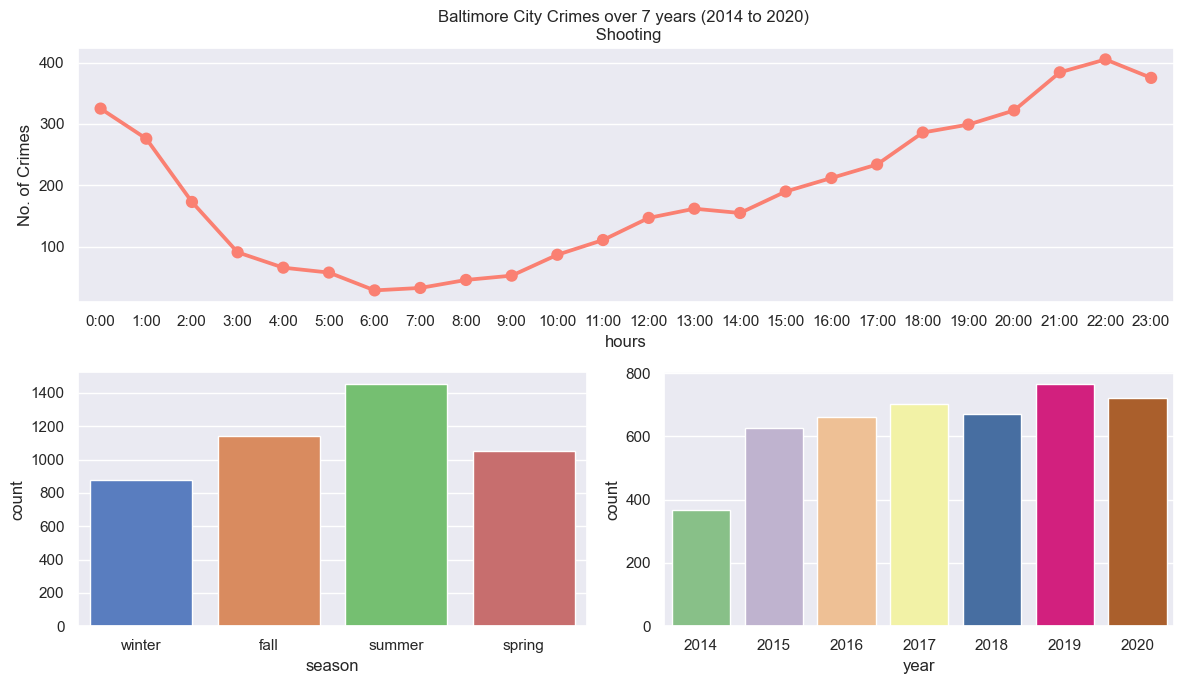

In [36]:
crimes (bpd, "SHOOTING", 'Shooting')

In [37]:
def district_year(df, column, label):
    dummy_df = df[df.Description==column]
    f, axes = plt.subplots(1,2)
    f.set_figheight(5)
    f.set_figwidth(15)
    plt.subplots_adjust(wspace=.5)
    crime_table = dummy_df.groupby(['year','day_name']).size().unstack('day_name')
    crime_table = crime_table[['Sunday','Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday']]
    cat_freq = dummy_df.District.value_counts()
    axes[0].set_title("Crimes by District")
    sns.countplot(y="District", data=dummy_df, order=cat_freq.index, palette='muted',ax=axes[0])
    #axes[1].set_title("")
    sns.heatmap(crime_table, linewidth=1, linecolor='w', cmap='YlOrRd', square=True, ax=axes[1])
    f.suptitle(f'Baltimore City Crimes over 7 years (2014 to 2020) \n {label}', y=0.98)


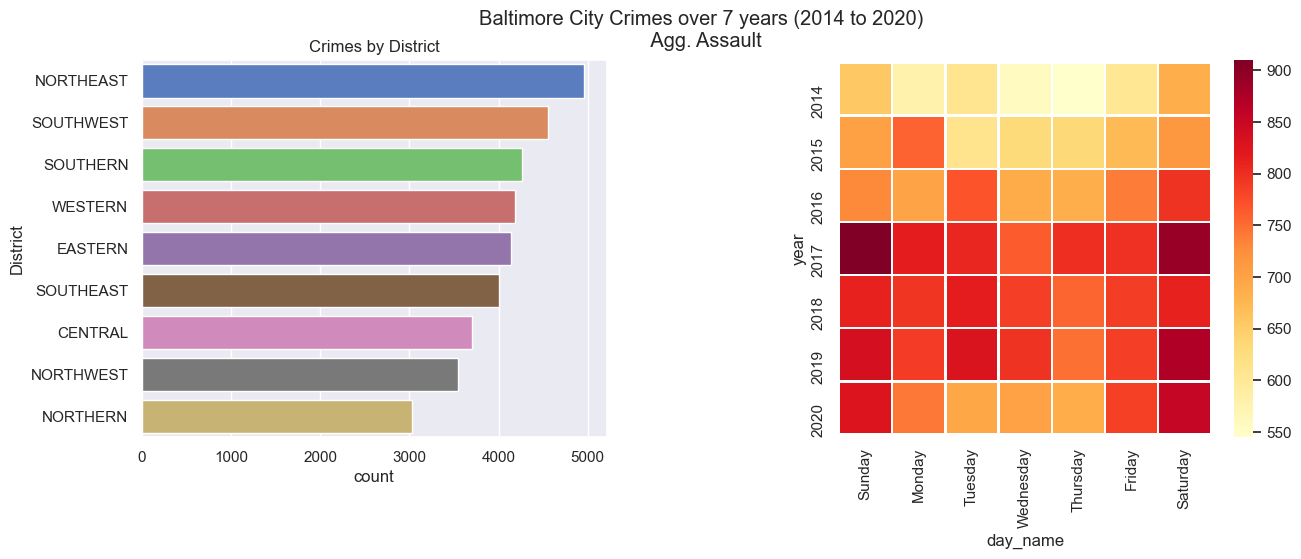

In [38]:
district_year (bpd, 'AGG. ASSAULT', 'Agg. Assault')

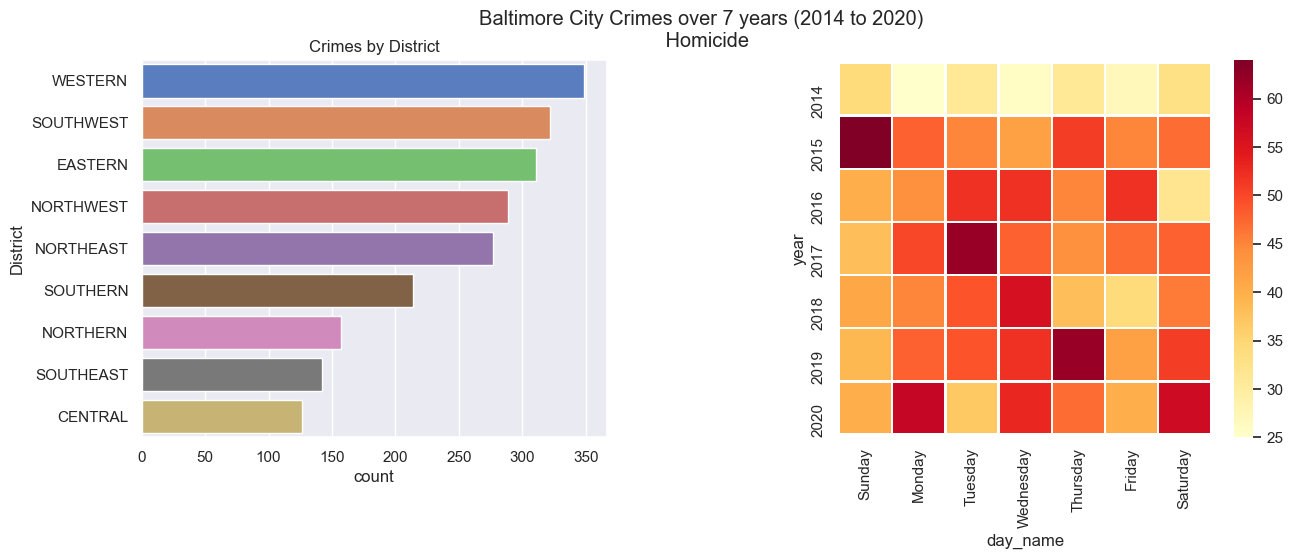

In [39]:
district_year (bpd, "HOMICIDE", 'Homicide')

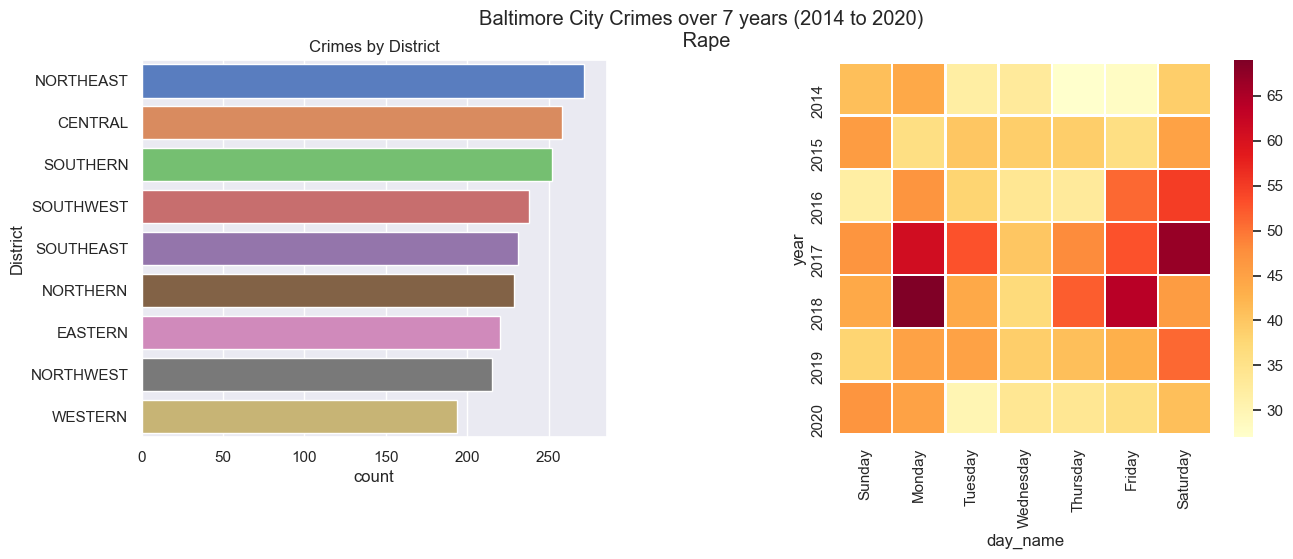

In [40]:
district_year (bpd, "RAPE", 'Rape')

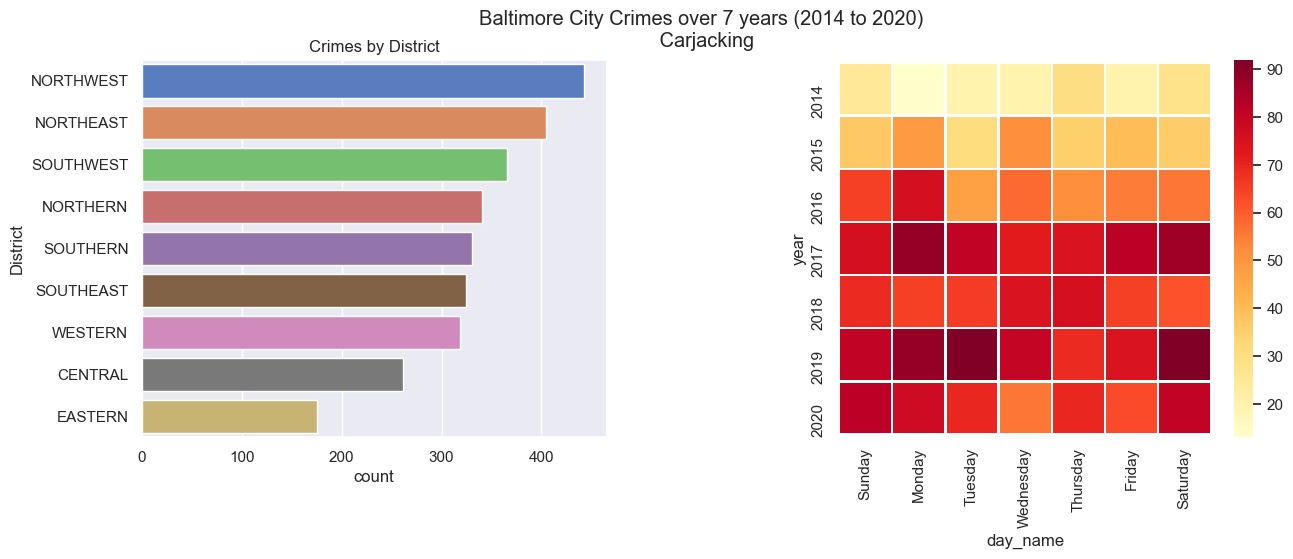

In [41]:
district_year (bpd, "ROBBERY - CARJACKING", 'Carjacking')

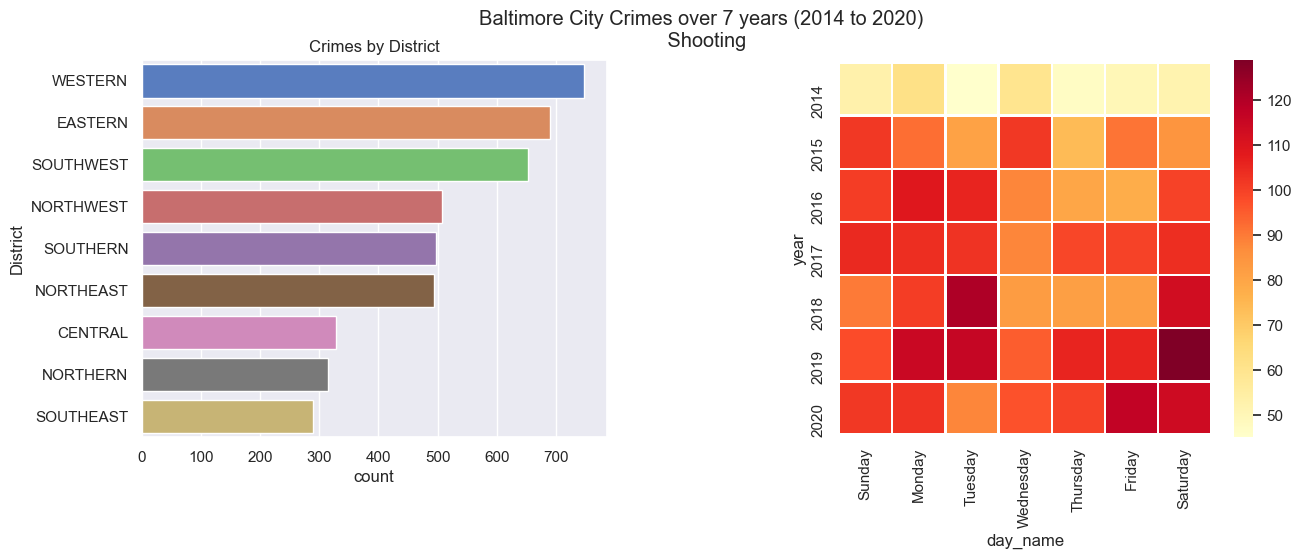

In [42]:
district_year (bpd, "SHOOTING", 'Shooting')

For all the crime types with increasing trends, the following table shows the dangerous neighborhoods and police districts.

| Crime type         | Neighborhood        | Police District |
| ------------------ | ------------------- | --------------- |
| Agg. assault       | Downtown            | Northeast       |
| Homicide           | Sandtown-Winchester | Western         |
| Rape               | Downtown            | Northeast       |
| Robbery-carjacking | Frankford           | Northwest       |
| Shooting           | Sandtown-Winchester | Western         |

Further analysis of the individual crimes with increasing trends reveals that summer is the most season when most of the crimes occurs (homicide, agg.assault, shooting) and spring/summer in the case of rape. For majority of the crime type (agg.assault, homicide, shooting and carjacking), the lowest occurrence is reported between 5am and 7am. It then starts to increase steadily until it reaches the peak between 9am and midnight.  Rape on the other hand has the lowest occurrence between 6am and 11am with some few spikes around noon and 3pm. It then increases gradually until it reached the peak around midnight. 

## Conclusions

Analyzing 7 years (2014 to 2020) of Baltimore City crime data reveals that five crime types (Larceny, Common assault, Burglary, Larceny from auto, agg.assault) make up the majority of crime in the city, amounting to about 78% of the overall crime. Among the crime types reported, five (agg.assault, homicide, rape, robbery-carjacking and shooting) exhibit increasing trends with percentages increase that range from 8% to 400%. For most of these crime types, crime is low in the early morning hours from around 5am - 7am and rises steadily to its peak between 9pm and midnight.  It also reveals that summer is the season when crime is likely to occur. Downtown is considered to be the most dangerous neighborhood because the crime count is highest. Rape on the other hand, usually occurs mostly around midnight and reduces gradually until it reaches the lowest in the early morning hours.